# 1. Math Drills

Give an example of a binary relation on a set which is

1. Reflexive and symmetric, but not transitive  
2. Reflexive, but neither symmetric nor transitive  
3. Symmetric, but neither reflexive nor transitive  
4. Transitive, but neither reflexive nor symmetric  

Recall the definitions from the lectures if you need to!

In [11]:
def reflexive(R, A):
    """Returns True if a relation R on set A is reflexive, False otherwise."""
    for a in A:
        if (a, a) not in R:
            return False
    return True

def symmetric(R, A):
    """Returns True if a relation R on set A is symmetric, False otherwise."""
    for a, b in R:
        if (b, a) not in R:
            return False
    return True

def transitive(R, A):
    """Returns True if a relation R on set A is transitive, False otherwise."""
    for a in A:
        for b in A:
            if (a, b) in R:
                for c in A:
                    if (b, c) in R and (a, c) not in R:
                        return False
    return True

# 1 
number1Set = set([1,2,3])
number1Rels = [(1,1),(1,2),(2,1),(1,3),(3,1), (2,2), (3,3)]

print(f'#1 is is reflective: {reflexive(number1Rels, number1Set)}, is symetric: {symmetric(number1Rels, number1Set)}, is transitive: {transitive(number1Rels, number1Set)}')

# 2
number2Set = set([1,2,3])
number2Rels = [(1,1),(1,2), (2,2),(3,3),(3,1)]

print(f'#2 is is reflective: {reflexive(number2Rels, number2Set)}, is symetric: {symmetric(number2Rels, number2Set)}, is transitive: {transitive(number2Rels, number2Set)}')


# 3
number3Set = set([1,2,3])
number3Rels = [(1,1),(1,2),(2,1),(1,3),(3,1)]

print(f'#3 is is reflective: {reflexive(number3Rels, number3Set)}, is symetric: {symmetric(number3Rels, number3Set)}, is transitive: {transitive(number3Rels, number3Set)}')

# 4
number4Set = set([1,2,3])
number4Rels = [(1,2),(1,3),(2,2),(2,3),(3,3)]

print(f'#4 is is reflective: {reflexive(number4Rels, number4Set)}, is symetric: {symmetric(number4Rels, number4Set)}, is transitive: {transitive(number4Rels, number4Set)}')

#1 is is reflective: True, is symetric: True, is transitive: False
#2 is is reflective: True, is symetric: False, is transitive: False
#3 is is reflective: False, is symetric: True, is transitive: False
#4 is is reflective: False, is symetric: False, is transitive: True


# Exercise 2: A bunch of Math!

## 2.0 Polynomial

Consider the polynomial

$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Write a function `p` such that `p(x, coeff)` that computes the value in given a point `x` and a list of coefficients `coeff`.

```
p(5, [1, 1]) = 1 + 5 = 6
p(5, [2, 1, 1]) = 2 + 5 + 25 = 31
```

In [42]:
import functools
import operator

def p(x, coeff):
    total = coeff[0]**0
    coeff.pop()
    for index in range(len(coeff)):
         current_coeff = coeff[index]
         current_power = index + 1
         total = total + (x**current_power)
    return total

print(p(5, [1, 1]))
print(p(5, [2, 1, 1]))

6
31


# 2.1 Variance

Define a function named `var` that takes a list of numbers and computes the variance. The variance is:

$$variance(x) = ∑_i(x_i − average(x))^2$$

Don't cheat and use `numpy.var`! You should only use that function to test that your function is correct

In [45]:
import statistics
import functools
import operator

def variance(sample):
    mean = statistics.mean(sample)
    differences_squared = list(map(lambda x : (x - mean)**2, sample))
    return functools.reduce(operator.add, differences_squared) / len(sample)

print(variance([11, 21, 11, 19, 46, 21, 19, 29, 21, 18, 3, 11, 11]))    

103.94082840236686


# 2.2 RMSE

Calculate the root mean squared error (RMSE) of a machine learning model's output. The function takes in two lists: one with actual values, one with predictions. The formula for RMSE is:

$$RMSE(y_1, y_2) = \sqrt{\dfrac{1}{N} \sum_{i=1}^N (y_{1i} - y_{2i})^2}$$

```
    rmse([1, 2], [1, 2]) = 0
    rmse([1, 2, 3], [3, 2, 1]) = 1.63
```

You can use 

```
sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
```

To test your function

In [8]:
import statistics
import functools
import operator
import math

def rmse(y_actual, y_predicted):
    differences_squared = [(y_actual[i] - y_predicted[i])**2 for i in range(len(y_actual))]
    return math.sqrt(sum(differences_squared) / len(differences_squared) )
    

print(rmse([1, 2], [1, 2]))
print(rmse([1, 2, 3], [3, 2, 1]))

0.0
1.632993161855452


# 2.3 Jaccard Similarity

The Jaccard similarity between two sets is the size of intersection divided by the size of union. Write a function that computes it:

$$jaccard(A, B) = \dfrac{|A \cap B|}{|A \cup B|}$$


```
jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4
```



In [10]:
def jaccard(A, B):
    set_a = set(A)
    set_b = set(B)
    return len(set_a.intersection(set_b)) / len(set_a.union(set_b))

jaccard({'a', 'b', 'c'}, {'a', 'd'})

0.25

# Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.  
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.  
1. If not, pay nothing.  


Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.  


Use no import besides `from numpy.random import uniform`.

In [66]:
from numpy.random import uniform

def random_device(k):
    winnings = 0
    k_occurences = []

    parse_head_tails = lambda x : 0 if x  < 0.5 else 1
    draws = list(map(parse_head_tails, uniform(0, 1, 10)))

    # grab all occurences starting and ending index
    last_validated_index = 0
    for i in range(0, len(draws)):
        if (draws[i] == 1 and i > last_validated_index and any(draws[i: i + k])):
            k_occurences.append(list([i, i + k])) 
            last_validated_index = i + k
    
    # check for consecutive occurences
    for i in range(0, len(k_occurences) - 1):
        if(k_occurences[i][1] == k_occurences[i + 1][0] - 1):
            winnings = 1
    # return winnings
    return winnings

random_device(2)


def simple_random_devise(k):
    parse_head_tails = lambda x : 0 if x  < 0.5 else 1
    draws = list(map(parse_head_tails, uniform(0, 1, 10)))
    return 1 if draws.count(1) >= k else 0

simple_random_devise(5)

3 4
6 7


1

# Exercise 4: Logistic Map fixed point

The **Logistic Map** is a famous function from Chaos Theory which is defined as:

$$x_{t+1} = r \cdot x_t(1−x_t)$$

with the conditions:

$$x_0 ∈ [0,1], r ∈[0,4]$$

Write a lambda $logistic(x, r)$, that's successively applied to itself through a second function `logistic_n_times(x0, f, r, n)`

Make a few runs of this for various values of `x0` and `r`. Answer the following:

- Can you find a fixed point? 

- At what values of `r` are there fixed points? 

- Are there any ranges of input for which the function is an attractor?

In [33]:
logistic = lambda x,r : r * x * (1 - x)

def logistic_n_times(x0, r, n):
    """
    :param x0: starting population ratio between 0 and 1
    :param r: biotic potential, between 0 and 4
    :param n: number of desired mappings should be bigger than 0
    Returns an indexed logistic map . Passing 0 as n will give you the next year only.
    """
    if(x0 < 0 or x0 > 1):
        raise ValueError('x0 should be between 0 and 1')
    if(r < 0 or r > 4):
        raise ValueError('r should be between 0 and 4')
    if(n < 0):
        raise ValueError('n should be over 0')
    logistic_map = [logistic(x0, r)]
    for nth in range(1, n+1):
       logistic_map.append(round(logistic(logistic_map[nth - 1], r), 2)) 

    return logistic_map
    

# print(logistic(0.5, 2.3))
# print(logistic(0.575, 2.3))
# logistic_n_times(0.8, 2.3, 20)
print(logistic_n_times(0.8, 1, 50))

print('logistic_n_times(0.8, 2.3, 20) fixed point at 0.56')  # r of 2.3 has a 
print('logistic_n_times(0.8, 0.60, 20) under 1 the function is attracted to 0') # 
print('logistic_n_times(0.8, 3.2, 20)  3.2 has a fixed point') 


[0.15999999999999998, 0.13, 0.11, 0.1, 0.09, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]
logistic_n_times(0.8, 2.3, 20) fixed point at 0.56
logistic_n_times(0.8, 0.60, 20) under 1 the function is attracted to 0
logistic_n_times(0.8, 3.2, 20)  3.2 has a fixed point


# Exercise 5 (stretch): Famous Chaos Theory Plot 

There is a famous plot in chaos theory of the logistic map that relates values of the attractors in $x_t$ for values of $r$, detailing where the function tends to "end up" for each value of $r$.

<img src="logistic map.png" style="width: 400px;">

Reproduce this plot using the `matplotlib` package.

**Hint:** Produce samples from the function to fill arrays on the x and y axis!

**Hint:** Take the final 50 values in a series of data points produced by the function!

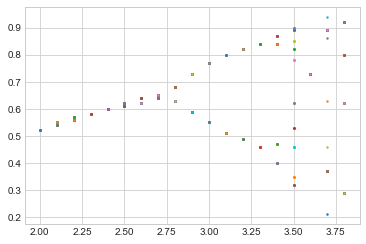

In [108]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

plt.style.use('seaborn-whitegrid')
def chaos_theory_plot(start_index = 10):    
    """
    """
    values = [logistic_n_times(0.8, i/10, 50) for i in range(1 + start_index, 40, 1)]

    x_arr = np.array(values)
    y = np.array(range(0 + start_index,40))/10

    fig, ax = plt.subplots()

    for i in range(0 + start_index, len(values)):
        for j in range(0 + start_index, len(values[i])):
            ax.scatter(y[i], values[i][j], s=2)

    plt.show()

chaos_theory_plot()
